# Credit Score Classification Prediction Project

In [1]:
import pandas as pd
import data_visualization
import model_func
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

"new_cs.csv" oluşturulmadıysa çalıştırılacak kod parçası:

In [12]:
import credit_func

url = "credit-score.csv"
credit_data = pd.read_csv(url)

In [ ]:
credit_func.create_dataFrame(credit_data, csv=True)

## Veri Görselleştirme (Data Visualization)

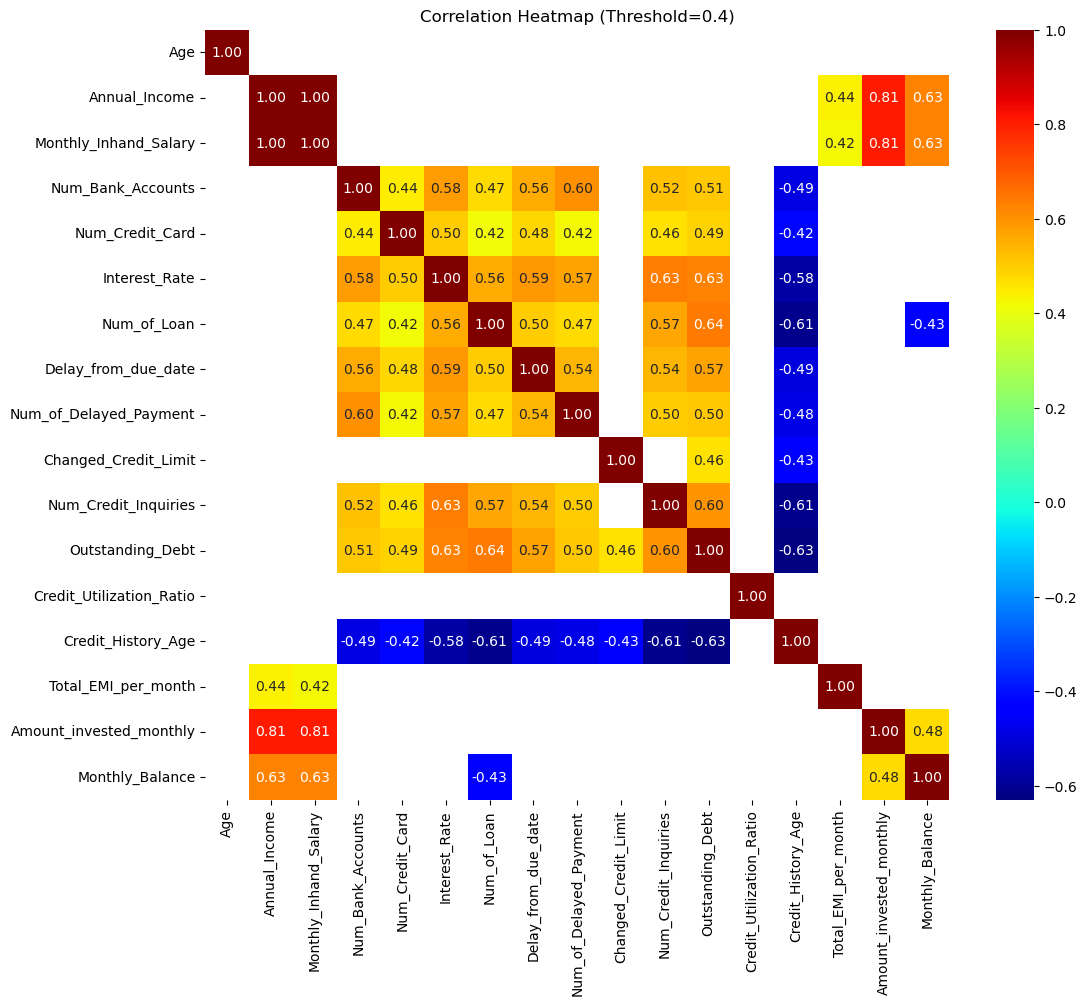

In [13]:
data_visualization.correlation_threshold(credit_data, numeric_exclude=["ID", "Customer_ID","Month","SSN"])

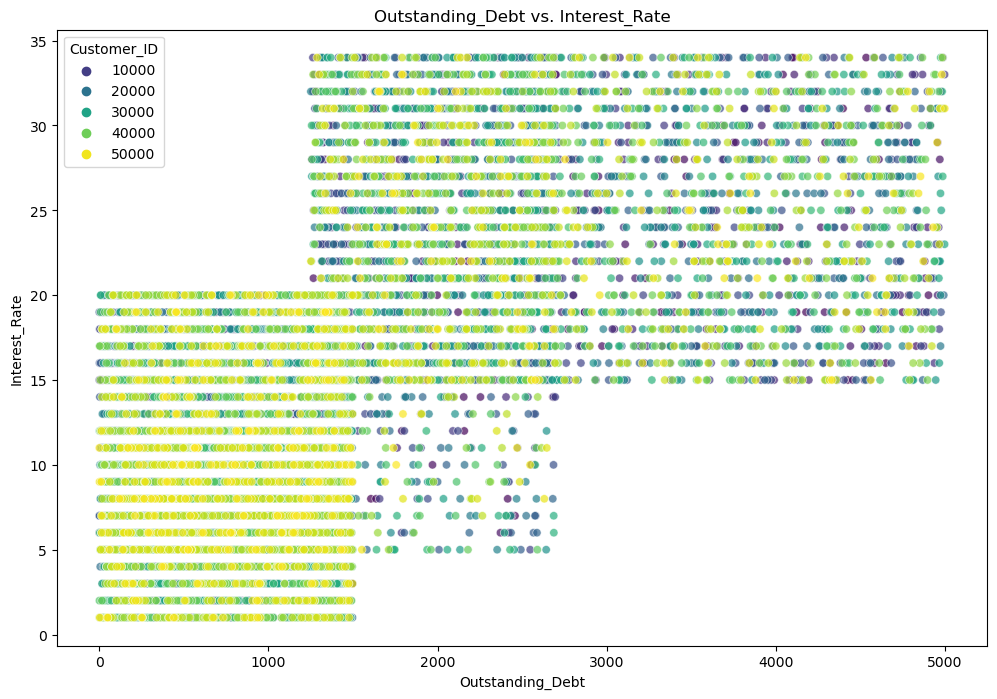

In [4]:
data_visualization.scatter_plot_grouped(credit_data,"Customer_ID", 'Outstanding_Debt', 'Interest_Rate', palette='viridis', alpha=0.7)

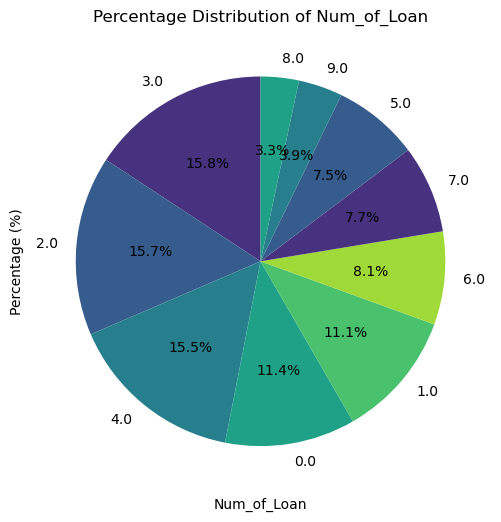

In [14]:
# Alınan kredilerin sayısının dağılımının sütun grafiğinde gösterimi
data_visualization.plot_percentage_distribution(credit_data, "Num_of_Loan")

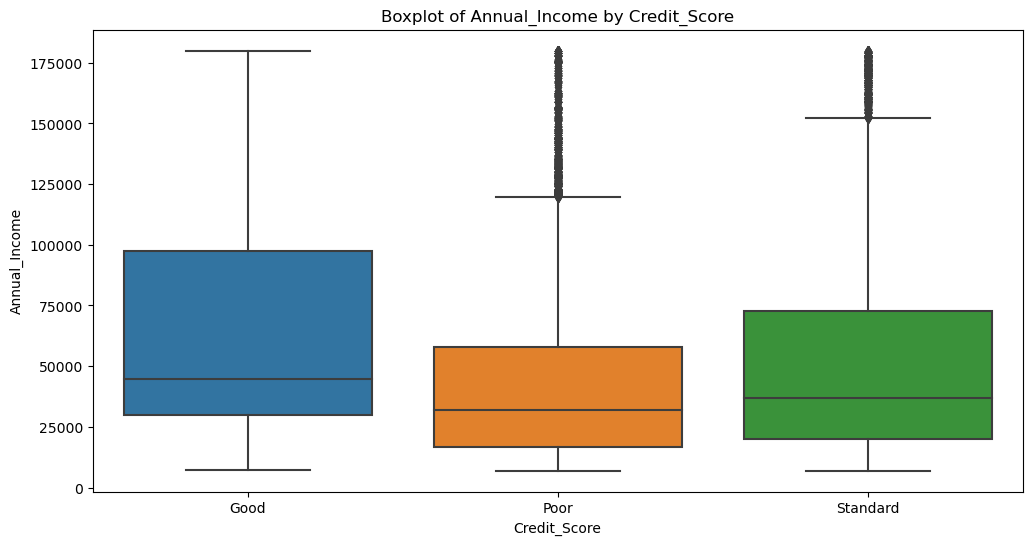

In [15]:
data_visualization.plot_boxplot(credit_data, 'Annual_Income', 'Credit_Score')

## Yeni Veri Seti Oluşturma (Create New Dataset)

In [2]:
url = "new_cs.csv"
credit_data = pd.read_csv(url)
pd.set_option('display.max_columns', None)
credit_data.drop("Unnamed: 0",axis=1,inplace=True)

### Yeni örnekleme öncesi (Before resample) :

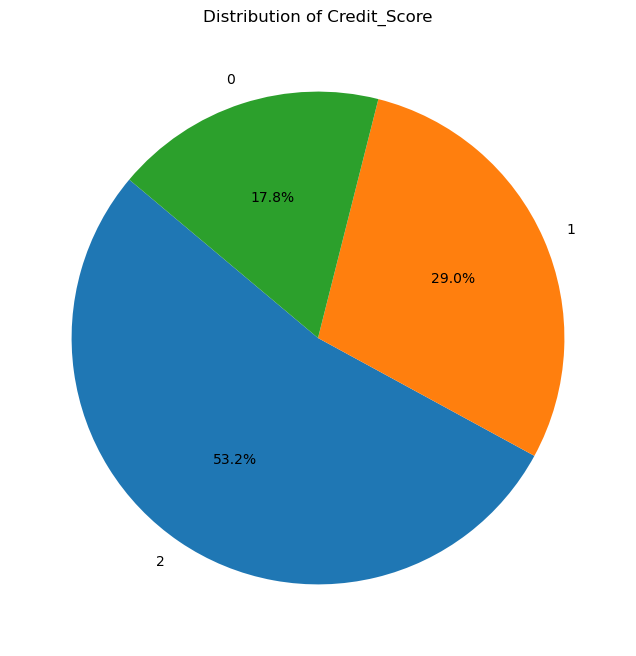

In [17]:
data_visualization.pie_chart_distribution(credit_data,"Credit_Score")

### Yeniden Örnekleme (ReSample)

In [3]:
# Özellik isimleri ve hedef değişken
feature_names = ['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Amount_invested_monthly', 'Interest_Rate', 'Outstanding_Debt',
       'Num_of_Loan', 'Total_Payment_to_Credit_Limit_Ratio',
       'Debt_per_Credit_Card', 'Credit_Card_Utilization_Density',
       'Daily_Payment_Delay', 'High_Credit_Use']
target = "Credit_Score"

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = credit_data[feature_names]
y = credit_data[target]

# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeniden örneklenmiş veriyi kontrol
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=feature_names), pd.Series(y_resampled, name=target)], axis=1)

### Örnekleme Sonrası

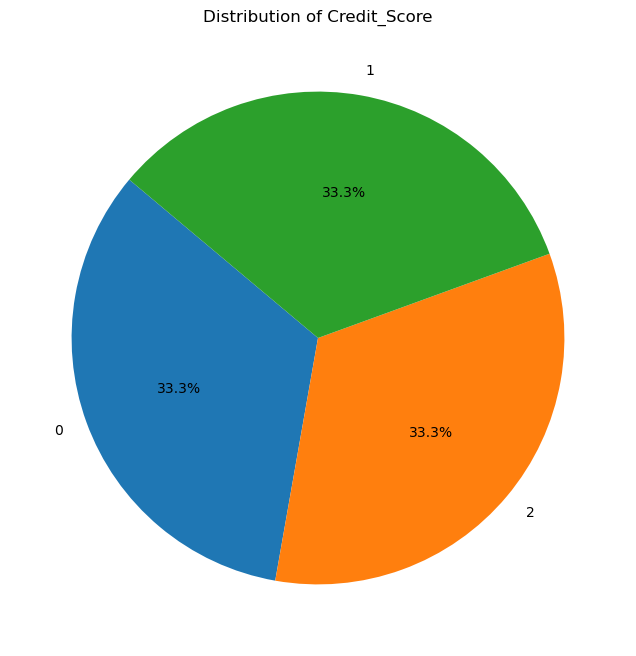

In [19]:
data_visualization.pie_chart_distribution(resampled_data,"Credit_Score")

### Train - Test Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Modellerin Uygulanması (The Implementation of Models)

### KNN Model

In [5]:
model_func.train_knn_model(X_train, X_test, y_train, y_test, n_neighbors=4)

KNN Accuracy: 0.867
KNN Precision: 0.872
KNN Recall: 0.867
KNN F1 Score: 0.861


### Logistic Regression Model

Logistic Regression Accuracy: 0.656
F1-Score: 0.650
Jaccard Score: 0.488
Confusion Matrix:
[[8435  289 1986]
 [1405 7608 1565]
 [3114 2606 4897]]


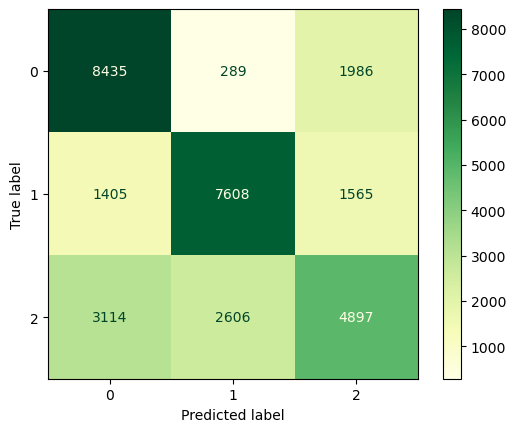

In [7]:
model_func.train_logistic_regression_model(X_train, X_test, y_train, y_test)

### Decision Tree Model

Decision Tree Accuracy: 0.820
F1-Score: 0.820
Jaccard Score: 0.698
Confusion Matrix:
[[9375  132 1203]
 [ 125 8938 1515]
 [1215 1562 7840]]


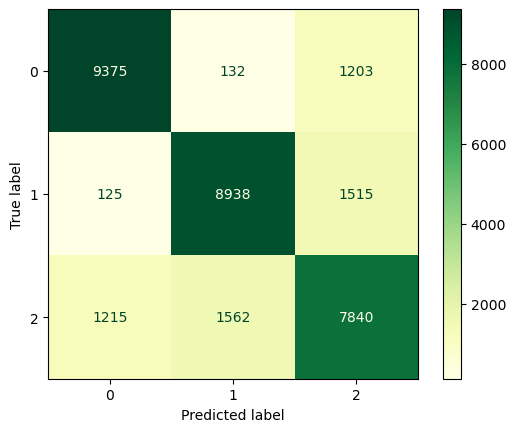

In [8]:
model_func.train_decision_tree_model(X_train, X_test, y_train, y_test)

### Random Forest Model

Random Forest Accuracy: 0.861
F1-Score: 0.860
Jaccard Score: 0.757
Confusion Matrix:
[[9908   19  783]
 [  57 9459 1062]
 [1059 1463 8095]]


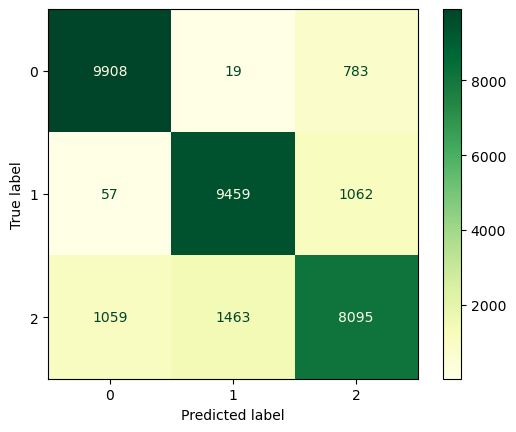

In [11]:
model_func.train_random_forest_model(X_train, X_test, y_train, y_test)

### Naive Bayes Model

Naive Bayes Accuracy: 0.628
Precision: 0.6255753978364249
Recall: 0.6282400877605391
F1-Score: 0.627
Jaccard Score: 0.463
Confusion Matrix:
[[7130  312 3268]
 [1216 7739 1623]
 [2734 2708 5175]]


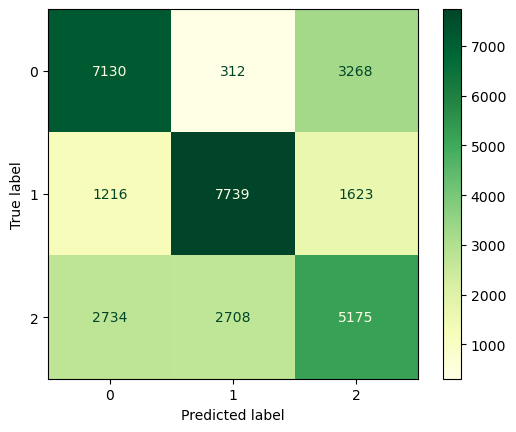

In [9]:
model_func.train_naive_bayes(X_train, X_test, y_train, y_test)